In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from netCDF4 import Dataset
import numpy as np 
from scipy import stats

In [2]:
fra = Dataset('FRA_msk_alt/fra.nc', 'r')
top = fra['FRA_msk_alt']
top = top[:-100,:1650]

In [3]:
segments = pd.read_hdf('preproc_segments.h5', 'segments')
segments.head(1)

,time,dist,climb,ride_dist,ride_climb,altitude,long,lat,speed,dist_remaining,gradient,ride_index
0,57.0,227.154648,-2.0,0.0,0.0,8.0,-0.250998,49.27919,3.985169,121579.171875,-0.880457,0


In [4]:
fra_long = fra['longitude'][:].data
fra_lat = fra['latitude'][:].data
long_regress = stats.linregress(fra_long, np.arange(fra_long.size))
m_long, offset_long = long_regress.slope, long_regress.intercept
lat_regress = stats.linregress(fra_lat, np.arange(fra_lat.size))
m_lat, offset_lat = lat_regress.slope, lat_regress.intercept

[]

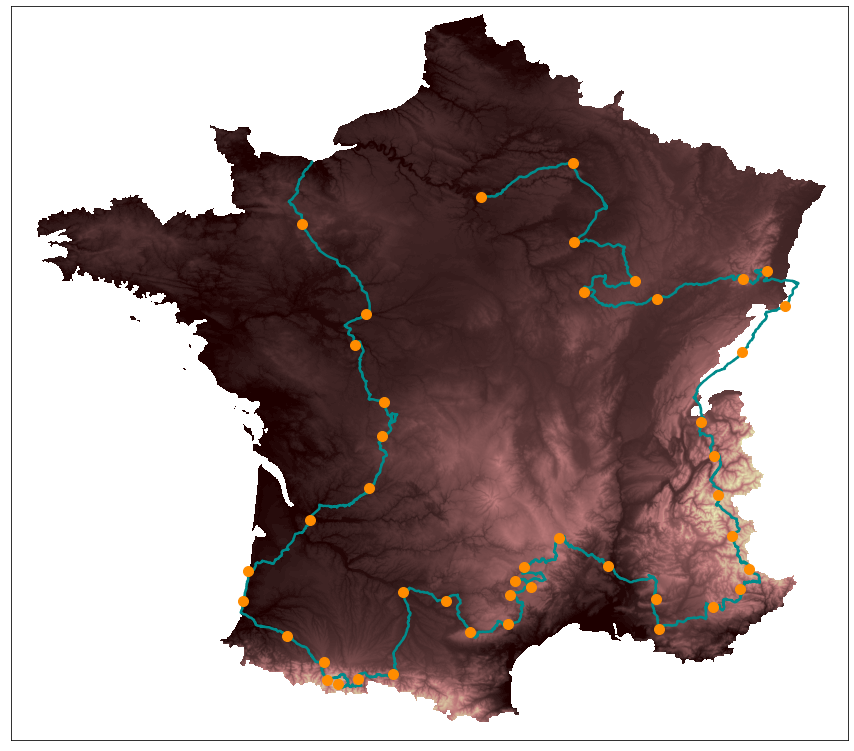

In [14]:
fig, ax = plt.subplots(figsize=(15,15))
elev = top[:] + 0
ax.imshow(elev, cmap="pink", vmin=0, vmax=top.max())
ax.set_aspect(1.33)

for idx in np.unique(segments['ride_index']):
    fltr = segments['ride_index'] == idx 
    x = segments.loc[fltr,'long'] * m_long + offset_long 
    y = segments.loc[fltr,'lat'] * m_lat + offset_lat
    plt.plot(x, y, linewidth=2.5, c='DarkCyan')
    plt.scatter(x.iloc[-1], y.iloc[-1], s=100, c='DarkOrange', zorder=5)

ax.set_xticks([])
ax.set_yticks([])

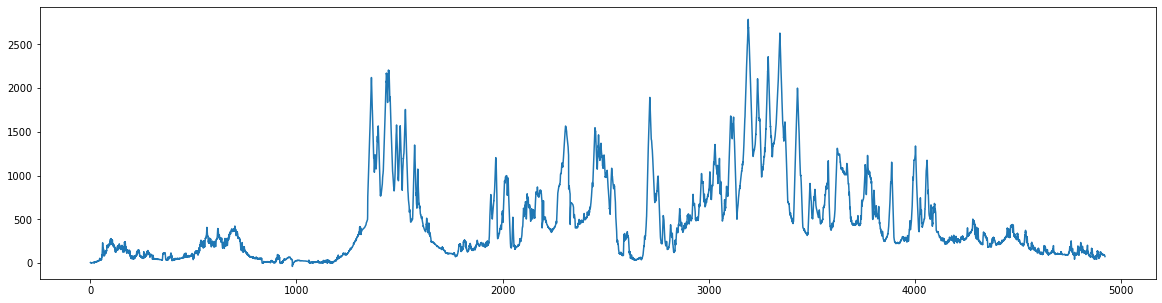

In [6]:
fig, ax = plt.subplots(figsize=(20,5))
plt.plot(segments['dist'].cumsum() / 1000, segments['altitude'])

In [ ]:
# to mark: 
# Col de Tourmalet 
# Pic Nore 
# Col de Finiels 
# Mont Ventoux 
# Cime de la Bonette 
# Grand Ballon 